Librerías y Funciones propias:

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

import numpy as np
import pyroomacoustics as pra
import matplotlib.pyplot as plt
from algoritmos.CC import timeAveragedcrossCorrelation
from algoritmos.GCC import generalizedCrossCorrelation
from algoritmos.DOA import doa

Señales de entrada:

In [2]:
duration = 1.0  
fs = 48000  
time = np.linspace(0, duration, int(fs * duration))
np.random.seed(42)
impulse = 0.05 * np.random.randn(len(time))
impulse[(len(time))//2] += 1.0


Simulación:

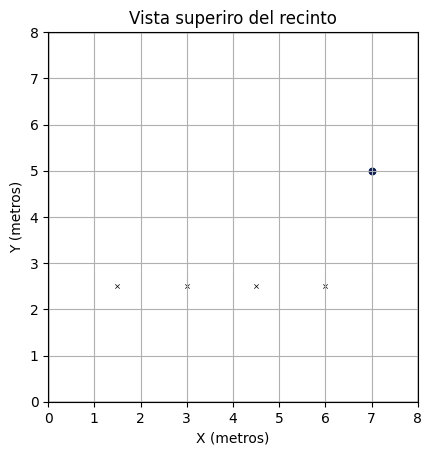

In [3]:
# Room dimensions (width*length)
roomDimensions = [8, 8]

# Create a room
room = pra.ShoeBox(roomDimensions, fs=fs, max_order=0)

# Sound source position (x,y,z)
sourcePosition = [7, 5]

# Add the source to the room
room.add_source(sourcePosition, signal=impulse)

# Define a linear Microphone Array: 4 mics in a row
distanceBetweenMics = 1.5
initialMicPosition = [1.5, 2.5]

# Calculate positions for 4 microphones
micPositions = np.array([
    [initialMicPosition[0] + i * distanceBetweenMics, 
     initialMicPosition[1]]
    for i in range(4)
])

# Add microphones to the room
room.add_microphone_array(pra.MicrophoneArray(micPositions.T, room.fs))

fig, ax = room.plot()
ax.set_title("Vista superiro del recinto")
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
plt.grid(True)
plt.xlabel('X (metros)')
plt.ylabel('Y (metros)')
plt.show()


Simulamos el room:

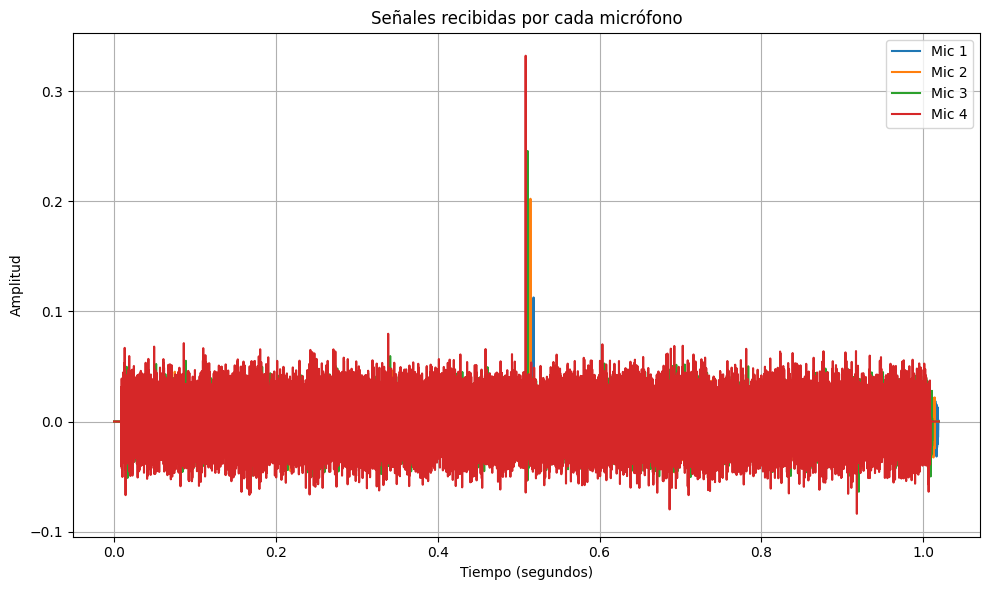

In [4]:
# Run the room simulation
room.simulate()

# Get the microphone signals
micSignals = room.mic_array.signals
numberSamples = micSignals.shape[1]
timeAxis = np.linspace(0, numberSamples / room.fs, numberSamples)

# Plot the signals received by each microphone
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(timeAxis, micSignals[i], label=f'Mic {i+1}')
plt.legend()
plt.title('Señales recibidas por cada micrófono')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.tight_layout()
plt.show()

Algoritmos

Time Averaged Cross Correlation

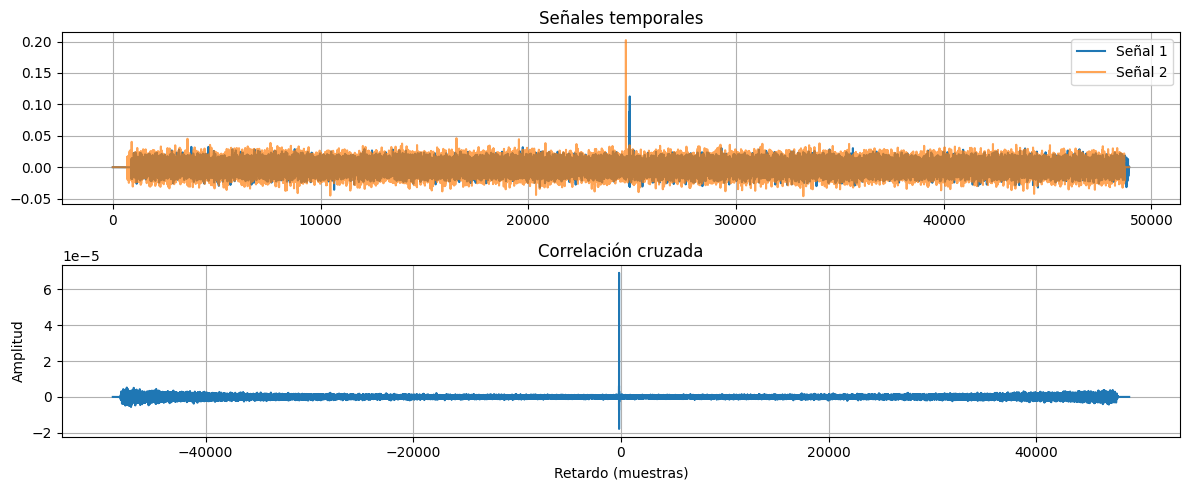

Delays between microphones (in seconds): [0.003875, 0.007333333333333333, 0.009791666666666667, 0.0034583333333333332, 0.005916666666666666, 0.002479166666666667]
DOA time averaged cross correlation:  40.50002248245957


In [5]:
distanceBetweenMics = [1.5, 3.0, 4.5, 1.5, 3.0, 1.5]

delays = []
delays.append((timeAveragedcrossCorrelation(micSignals[0], micSignals[1], returnDelay=True, graphs=True)[1]) / fs)
delays.append((timeAveragedcrossCorrelation(micSignals[0], micSignals[2], returnDelay=True, graphs=False)[1]) / fs)
delays.append((timeAveragedcrossCorrelation(micSignals[0], micSignals[3], returnDelay=True, graphs=False)[1]) / fs)
delays.append((timeAveragedcrossCorrelation(micSignals[1], micSignals[2], returnDelay=True, graphs=False)[1]) / fs)
delays.append((timeAveragedcrossCorrelation(micSignals[1], micSignals[3], returnDelay=True, graphs=False)[1]) / fs)
delays.append((timeAveragedcrossCorrelation(micSignals[2], micSignals[3], returnDelay=True, graphs=False)[1]) / fs)

print("Delays between microphones (in seconds):", delays)

print("DOA time averaged cross correlation: ", doa(delays, distanceBetweenMics))

GCC: Classic

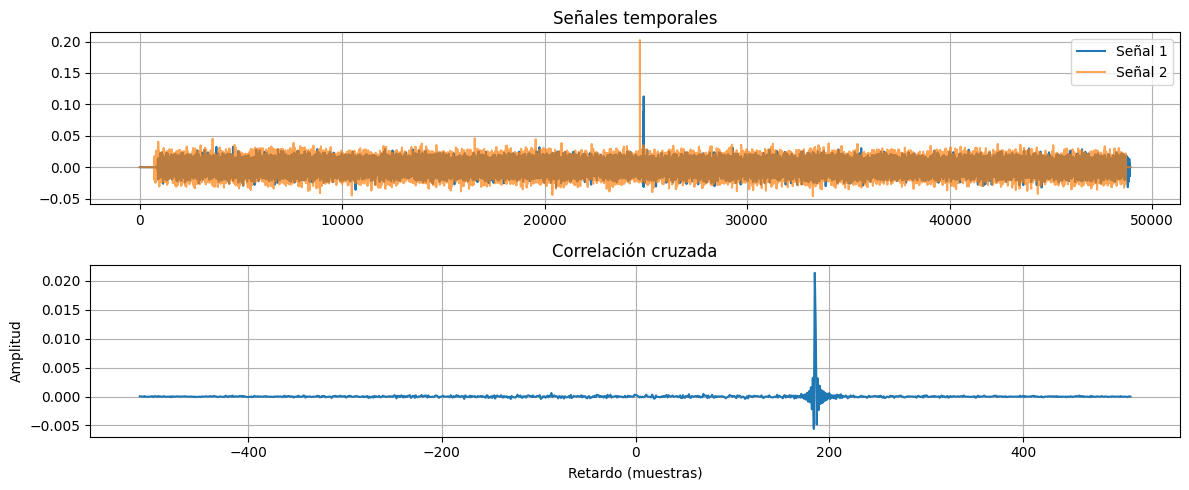

Delays between microphones (in seconds): [0.0038541666666666668, 0.0073125, 0.009770833333333333, 0.0034375, 0.005895833333333334, 0.002458333333333333]
DOA classic cross correlation:  40.8214807484482


In [11]:
delays = []
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[1], mode='classic', returnDelay=True, graphs=True)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[2], mode='classic', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[3], mode='classic', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[1], micSignals[2], mode='classic', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[1], micSignals[3], mode='classic', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[2], micSignals[3], mode='classic', returnDelay=True, graphs=False)[1]) / fs)

print("Delays between microphones (in seconds):", delays)

print("DOA classic cross correlation: ", doa(delays, distanceBetweenMics))

GCC: Roth

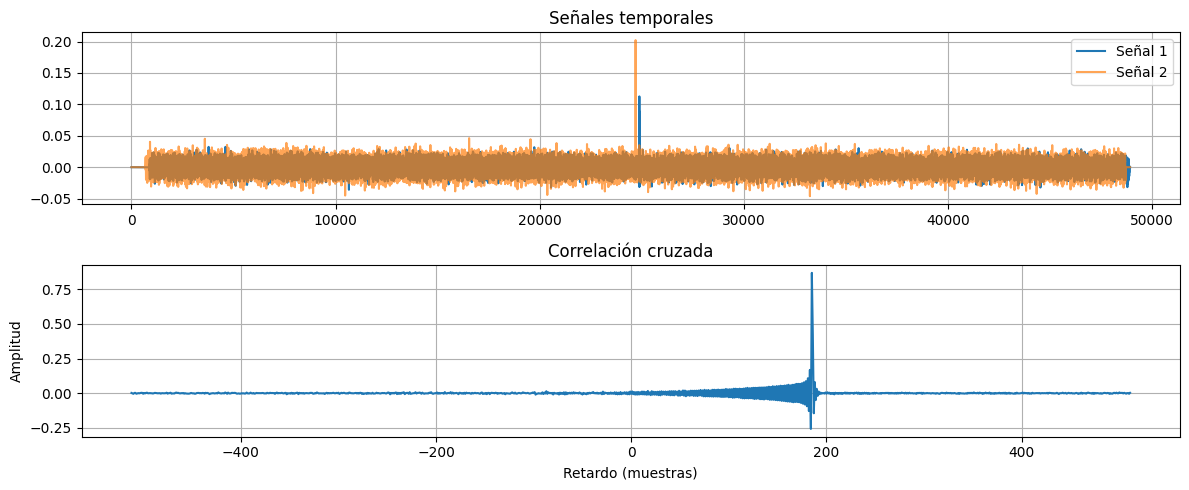

Delays between microphones (in seconds): [0.0038541666666666668, 0.0073125, 0.009770833333333333, 0.0034375, 0.005895833333333334, 0.002458333333333333]
DOA Roth:  40.8214807484482


In [12]:
delays = []
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[1], mode='roth', returnDelay=True, graphs=True)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[2], mode='roth', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[3], mode='roth', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[1], micSignals[2], mode='roth', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[1], micSignals[3], mode='roth', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[2], micSignals[3], mode='roth', returnDelay=True, graphs=False)[1]) / fs)

print("Delays between microphones (in seconds):", delays)

print("DOA Roth: ", doa(delays, distanceBetweenMics))

GCC: SCOT

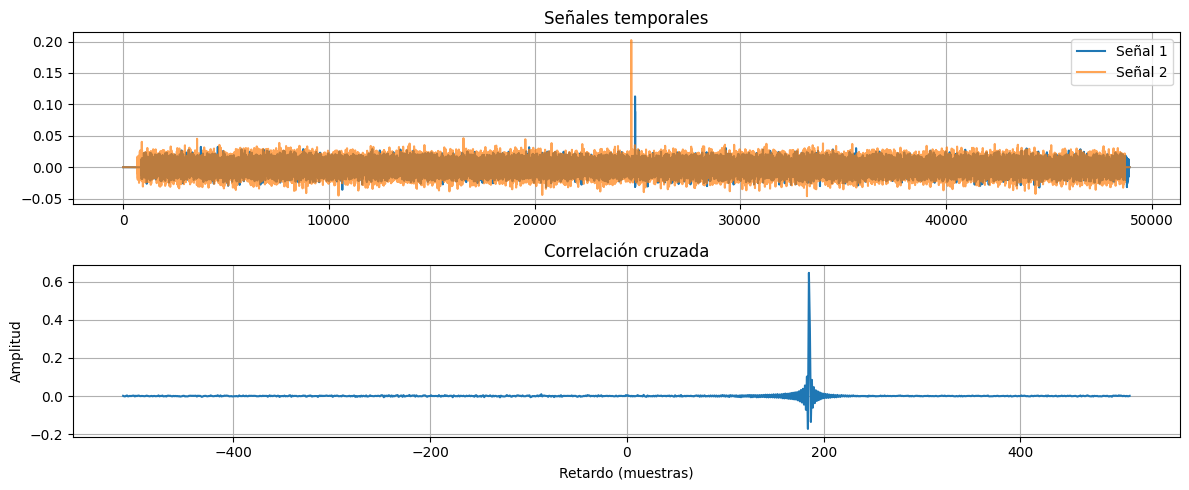

Delays between microphones (in seconds): [0.0038541666666666668, 0.0073125, 0.009770833333333333, 0.0034375, 0.005895833333333334, 0.002458333333333333]
DOA SCOT:  40.8214807484482


In [13]:
delays = []
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[1], mode='scot', returnDelay=True, graphs=True)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[2], mode='scot', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[3], mode='scot', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[1], micSignals[2], mode='scot', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[1], micSignals[3], mode='scot', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[2], micSignals[3], mode='scot', returnDelay=True, graphs=False)[1]) / fs)

print("Delays between microphones (in seconds):", delays)

print("DOA SCOT: ", doa(delays, distanceBetweenMics))

GCC: Phase

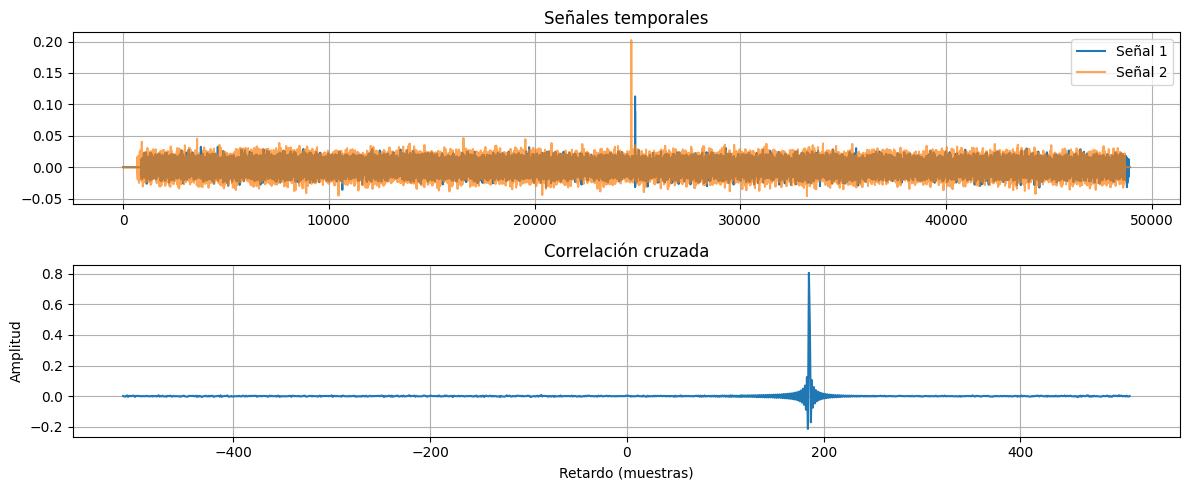

Delays between microphones (in seconds): [0.0038541666666666668, 0.0073125, 0.009770833333333333, 0.0034375, 0.005895833333333334, 0.002458333333333333]
DOA Phase:  40.8214807484482


In [14]:
delays = []
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[1], mode='phase', returnDelay=True, graphs=True)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[2], mode='phase', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[0], micSignals[3], mode='phase', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[1], micSignals[2], mode='phase', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[1], micSignals[3], mode='phase', returnDelay=True, graphs=False)[1]) / fs)
delays.append((generalizedCrossCorrelation(micSignals[2], micSignals[3], mode='phase', returnDelay=True, graphs=False)[1]) / fs)

print("Delays between microphones (in seconds):", delays)

print("DOA Phase: ", doa(delays, distanceBetweenMics))